___
# Exercício: Análise Exploratória - Variáveis Quantitativas
___

## Aula 03


## Índice

- [PERFOMANCE DE ESTUDANTES EM EXAMES](#students)

    
- [Base de dados e Dicionário das variáveis](#dados)
- [Leitura da base de dados](#leitura)
- [Preparo da base de dados](#preparo)


- [Exercício 1](#ex1) 
- [Exercício 2](#ex2) 

In [1]:
%matplotlib inline
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

from IPython.display import display  # Para ter melhor print.

___
<div id="students"></div>

# PERFORMANCE DE ESTUDANTES EM EXAMES

<img src="students.jpg" height="400">

Fonte: extraído da internet

<div id="dados"></div>

## Base de dados e Dicionário das variáveis:

A base de dados foi extraída da plataforma [Kaggle](https://www.kaggle.com/spscientist/students-performance-in-exams) intitulado “Students Performance in Exams”, cujo objetivo principal é verificar a performance do estudante considerando seu *background*. Ainda, para essa avaliação, a base de dados original passou por algumas transformações, como acréscimo de novas variáveis.

Essa base de dados possui informação de $1.000$ estudantes.

As variáveis apresentadas na base de dados `StudentsPerformance.csv` são:
 * `gender`: categozido em ['female', 'male'];
 * `race/ethnicity`: categorizado em ['group A', 'group B', 'group C', 'group D', 'group E'];
 * `parental level of education`: categorizado em ['some high school', 'high school', 'some college', 'associate's degree', 'bachelor's degree', 'master's degree'], respeitando essa ordem natural;
 * `lunch`: categorizado em ['free/reduced', 'standard'];
 * `test preparation course`: categorizado em ['completed', 'none'];
 * `math score`: nota obtida em matemática, com valor de $0$ a $100$;
 * `reading score`: nota obtida em leitura, com valor de $0$ a $100$; e
 * `writing score`: nota obtida em escrita, com valor de $0$ a $100$.
 
<br> 

Ainda, foram criadas as seguintes variáveis a partir das notas em cada prova:
 * `Xm`: se a nota de matemática for >= 80, vale 1; caso contrário, vale 0;
 * `Xr`: se a nota de leitura for >= 80, vale 1; caso contrário, vale 0;
 * `Xw`: se a nota de escrita for >= 80, vale 1; caso contrário, vale 0;
 * `Performance`: é definida pela soma de Xm, Xr e Xw. Assim, por exemplo, se `Perfomance` para um estudante for igual a 2, então esse estudante teve score >= 80 nas duas dessas três provas; e de forma análoga para demais caso.
 
Essas quatro últimas variáveis serão criadas rodando alguns códigos a seguir.

[Volta ao Índice](#indice)

<div id="leitura"></div>

## Leitura da base de dados

In [2]:
print("Esperamos trabalhar no diretório")
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\rafag\OneDrive\Área de Trabalho\2_semestre\cdados\aulas\aula03


In [3]:
filename = 'StudentsPerformance.csv'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook da avaliação, yay!\n')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'O notebook e os arquivos de dados desta avaliação devem ser salvos dentro da mesma pasta no seu computador.\n')

Parece que o arquivo StudentsPerformance.csv está na mesma pasta do notebook da avaliação, yay!



In [4]:
# Carregando os dados
dados = pd.read_csv('StudentsPerformance.csv')
dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


[Volta ao Índice](#indice)

<div id="preparo"></div>

## Preparo da base de dados

**IMPORTANTE:** Executem, por favor, todos os comandos a seguir antes de chegar de iniciar a resoluçao dos exercícios.

In [5]:
# Transforma as cinco primeiras colunas da base de dados como categóricas
dados.iloc[:,0:5]=dados.iloc[:,0:5].astype('category')

# Faz apenas essa ser ordinal respeitando a ordem das categorias definidas em categories
dados['parental level of education'] = pd.Categorical(dados['parental level of education'], 
                                                     categories=['some high school', 'high school',
                                                                 'some college',
                                                                 "associate's degree","bachelor's degree","master's degree"],
                                                      ordered=True)

# Visualização das categorias dessas variáveis
(lambda mostra_categorias: list(map(lambda x: dados.iloc[:,x].cat.categories,
                                    mostra_categorias)))([0,1,2,3,4])

[Index(['female', 'male'], dtype='object'),
 Index(['group A', 'group B', 'group C', 'group D', 'group E'], dtype='object'),
 Index(['some high school', 'high school', 'some college', 'associate's degree',
        'bachelor's degree', 'master's degree'],
       dtype='object'),
 Index(['free/reduced', 'standard'], dtype='object'),
 Index(['completed', 'none'], dtype='object')]

In [13]:
# Quantifica como 1, se notas >= 80; caso contrário, como 0
umzero = lambda x: 1 if x >= 80 else 0

# aparentemente da pra fazer assim mt brabo
# def umzero(x):
#     if x>=80:
#         return 1
#     else:
#         return 0

dados['Xm'] = dados['math score'].apply(umzero)
dados['Xr'] = dados['reading score'].apply(umzero)
dados['Xw'] = dados['writing score'].apply(umzero)

In [14]:
# Performance: número de provas com score >= 80 entre as 3 provas avaliadas
dados['Performance'] = dados.iloc[:,8:11].sum(axis=1)

In [15]:
# Conteúdo das 5 primeiras linhas da base de dados
dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Xm,Xr,Xw,Performance
0,female,group B,bachelor's degree,standard,none,72,72,74,0,0,0,0
1,female,group C,some college,standard,completed,69,90,88,0,1,1,2
2,female,group B,master's degree,standard,none,90,95,93,1,1,1,3
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,0,0,0
4,male,group C,some college,standard,none,76,78,75,0,0,0,0


In [16]:
dados.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course        category
math score                        int64
reading score                     int64
writing score                     int64
Xm                                int64
Xr                                int64
Xw                                int64
Performance                       int64
dtype: object

[Volta ao Índice](#indice)

<div id="ex1"></div>

## Exercício 1 - Classificação das variáveis contidas na base de dados

Faça a classificação de cada variável escolhendo um entre os quatro tipos possíveis:
 * Qualitativa Nominal
 * Qualitativa Ordinal
 * Quantitativa Discreta
 * QuantitativA Contínua

<div id="ex2"></div>

## Exercício 2 - Análise exploratória dos dados

O objetivo principal que norteia a manipulação dessa base de dados é compreender quais as características do estudante que podem ser responsáveis pela performance do estudante nos testes.

Nesse caso, utilize ferramentas estatísticas numéricos e gráficas que permitam explorar o conjunto de dados.


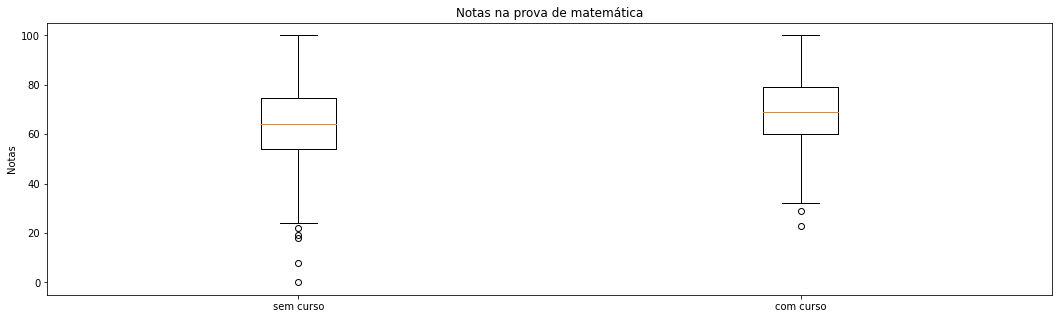

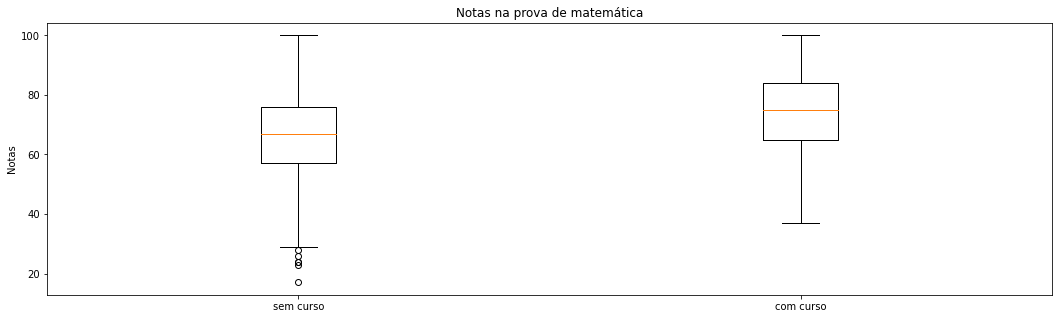

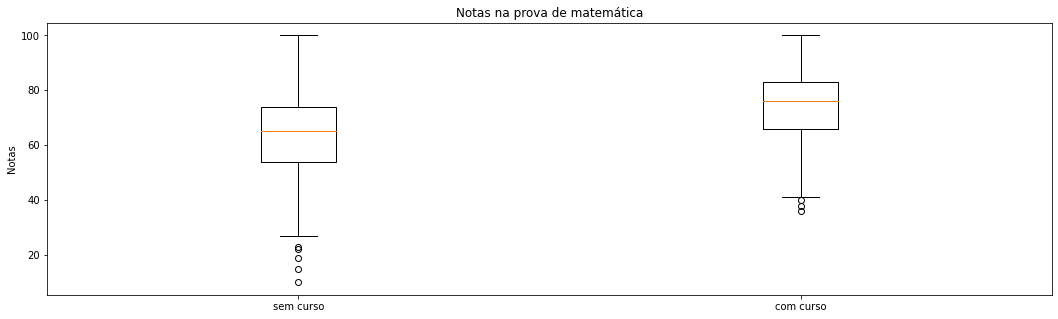

       math score
count  642.000000
mean    64.077882
std     15.192376
min      0.000000
25%     54.000000
50%     64.000000
75%     74.750000
max    100.000000
       math score
count  358.000000
mean    69.695531
std     14.444699
min     23.000000
25%     60.000000
50%     69.000000
75%     79.000000
max    100.000000
       reading score
count     642.000000
mean       66.534268
std        14.463885
min        17.000000
25%        57.000000
50%        67.000000
75%        76.000000
max       100.000000
       reading score
count     358.000000
mean       73.893855
std        13.638384
min        37.000000
25%        65.000000
50%        75.000000
75%        84.000000
max       100.000000
       writing score
count     642.000000
mean       64.504673
std        14.999661
min        10.000000
25%        54.000000
50%        65.000000
75%        74.000000
max       100.000000
       writing score
count     358.000000
mean       74.418994
std        13.375335
min        36.000000
25% 

In [38]:
# ESCREVA SUA RESPOSTA AQUI

plt.figure(figsize=(18,5))
plt.subplot(111)
plt.boxplot([dados.loc[dados["test preparation course"] == "none", "math score"], dados.loc[dados["test preparation course"] == "completed", "math score"]], labels=["sem curso", "com curso"])
plt.title("Notas na prova de matemática")
plt.ylabel("Notas")
plt.show()

plt.figure(figsize=(18,5))
plt.subplot(111)
plt.boxplot([dados.loc[dados["test preparation course"] == "none", "reading score"], dados.loc[dados["test preparation course"] == "completed", "reading score"]], labels=["sem curso", "com curso"])
plt.title("Notas na prova de matemática")
plt.ylabel("Notas")
plt.show()

plt.figure(figsize=(18,5))
plt.subplot(111)
plt.boxplot([dados.loc[dados["test preparation course"] == "none", "writing score"], dados.loc[dados["test preparation course"] == "completed", "writing score"]], labels=["sem curso", "com curso"])
plt.title("Notas na prova de matemática")
plt.ylabel("Notas")
plt.show()

print(dados.loc[dados["test preparation course"] == "none", "math score"].describe().to_frame())
print(dados.loc[dados["test preparation course"] == "completed", "math score"].describe().to_frame())
print(dados.loc[dados["test preparation course"] == "none", "reading score"].describe().to_frame())
print(dados.loc[dados["test preparation course"] == "completed", "reading score"].describe().to_frame())
print(dados.loc[dados["test preparation course"] == "none", "writing score"].describe().to_frame())
print(dados.loc[dados["test preparation course"] == "completed", "writing score"].describe().to_frame())